# HW0923_02 CH12Q03

#### (a) Plot the observations.

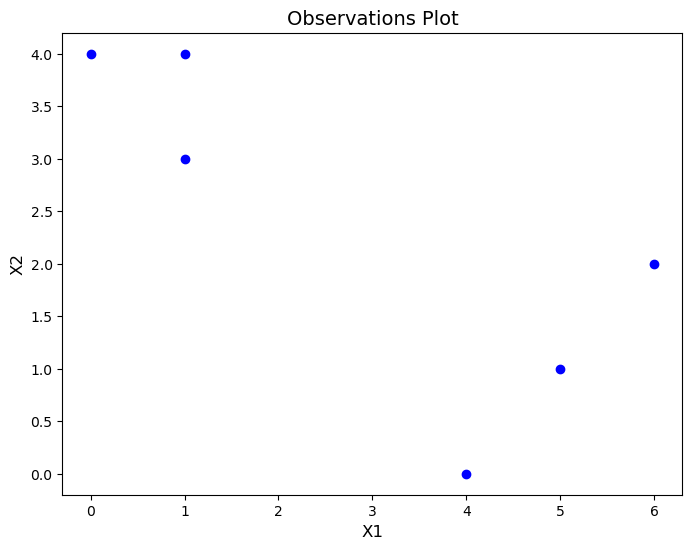

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X1 = np.array([1, 1, 0, 5, 6, 4])
X2 = np.array([4, 3, 4, 1, 2, 0])
data = np.column_stack((X1, X2))


plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], marker='o', color='b')

plt.title('Observations Plot', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)

plt.show()

#### (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [2]:
num_observations = 6
num_clusters = 2
np.random.seed(25)
cluster_labels = np.random.choice(range(num_clusters), size=num_observations)

for i in range(num_observations):
    print(f'觀察值 {i + 1}: 群集標籤 {cluster_labels[i]}')

觀察值 1: 群集標籤 0
觀察值 2: 群集標籤 0
觀察值 3: 群集標籤 0
觀察值 4: 群集標籤 1
觀察值 5: 群集標籤 1
觀察值 6: 群集標籤 0


#### (c) Compute the centroid for each cluster.

In [3]:
centroids = {}
for cluster in range(num_clusters):
    points = data[cluster_labels == cluster]
    if points.size > 0:
        centroid = points.mean(axis=0)
        centroids[cluster] = centroid

for cluster, centroid in centroids.items():
    print(f'Cluster {cluster}: Centroid {centroid}')

Cluster 0: Centroid [1.5  2.75]
Cluster 1: Centroid [5.5 1.5]


#### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [4]:
new_cluster_labels = np.zeros(len(data), dtype=int)

for i, point in enumerate(data):
    distances = np.array([np.linalg.norm(point - centroid) for centroid in centroids.values()])
    new_cluster_labels[i] = np.argmin(distances)

for i in range(len(data)):
    print(f'Observation {i + 1}: Cluster Label {new_cluster_labels[i]}')

Observation 1: Cluster Label 0
Observation 2: Cluster Label 0
Observation 3: Cluster Label 0
Observation 4: Cluster Label 1
Observation 5: Cluster Label 1
Observation 6: Cluster Label 1


#### (e) Repeat (c) and (d) until the answers obtained stop changing.

In [5]:
prev_labels = np.zeros(len(data), dtype=int)

while not np.array_equal(cluster_labels, prev_labels):
    prev_labels = cluster_labels.copy()

    centroids = {}
    for cluster in range(num_clusters):
        points = data[cluster_labels == cluster]
        if points.size > 0:
            centroid = points.mean(axis=0)
            centroids[cluster] = centroid

    for i, point in enumerate(data):
        distances = np.array([np.linalg.norm(point - centroid) for centroid in centroids.values()])
        cluster_labels[i] = np.argmin(distances)

print("Final Cluster Labels:")
for i in range(len(data)):
    print(f'Observation {i + 1}: Cluster Label {cluster_labels[i]}')

print("\nFinal Centroids:")
for cluster, centroid in centroids.items():
    print(f'Cluster {cluster}: Centroid {centroid}')

Final Cluster Labels:
Observation 1: Cluster Label 0
Observation 2: Cluster Label 0
Observation 3: Cluster Label 0
Observation 4: Cluster Label 1
Observation 5: Cluster Label 1
Observation 6: Cluster Label 1

Final Centroids:
Cluster 0: Centroid [0.66666667 3.66666667]
Cluster 1: Centroid [5. 1.]


##### (f) In your plot from (a), color the observations according to the cluster labels obtained.

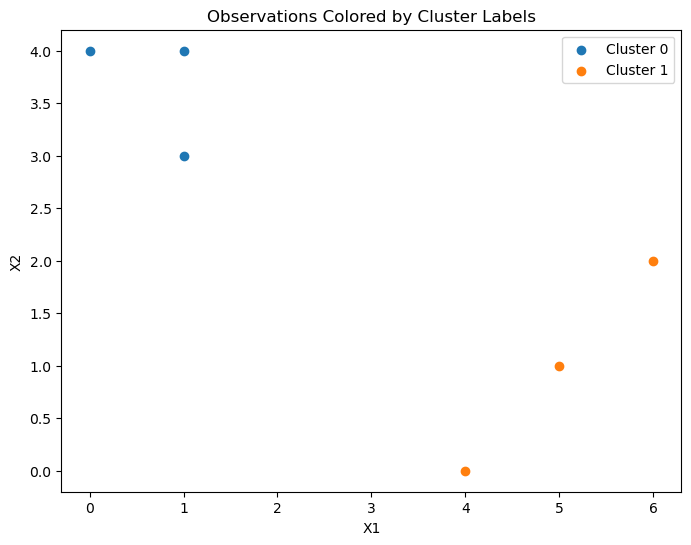

In [6]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_points = data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', marker='o')

plt.title('Observations Colored by Cluster Labels')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()